In [1]:
using Statistics
using NetCDF
using PyPlot
include("plotmap.jl");

In [2]:
fname="data/ERA5/total_precipitation/ERA5_total_precipitation_mon.year.nc"
ncinfo(fname) #information about the variables 
tp=ncread(fname, "tp"); #name of the variables i want to read 
lon=ncread(fname, "lon");
lat=ncread(fname, "lat");
time=ncread(fname, "time");


##### NetCDF File #####

/home/jupyter-clima4/data/ERA5/total_precipitation/ERA5_total_precipitation_mon.year.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 180                       
time                                                UNLIMITED (71 currently)  
bnds                                                2                         
lon                                                 360                       

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             DOUBLE          lat                             
time                            DOUBLE          time                            
tp                              FLOAT

In [3]:
xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);


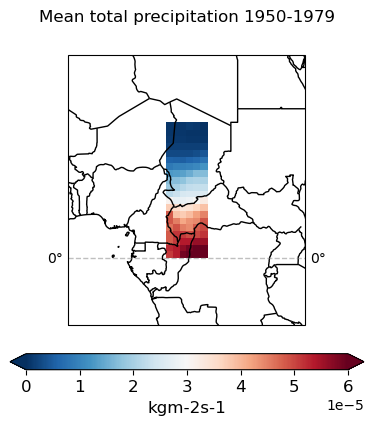

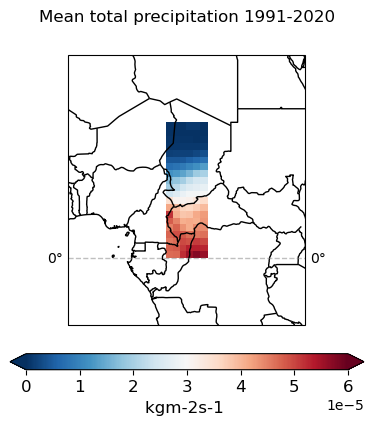

In [14]:
tp1 = tp[:,:,1:29];
tp2=tp[:,:,42:71]


tp1mean=mean(tp1,dims=3);
tp2mean=mean(tp2,dims=3)
xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);
figure()
plotmap(lon[xrange], lat[yrange], tp1mean[xrange, yrange],
        clabel="kgm-2s-1", cstep=0:0.00001:0.00006, 
        titles="Mean total precipitation 1950-1979", 
        tfs=12, region=(0, 35, -10,30), borders=true)
figure()
plotmap(lon[xrange], lat[yrange], tp2mean[xrange, yrange],
        clabel="kgm-2s-1 ", cstep=0:0.00001:0.00006, 
        titles="Mean total precipitation 1991-2020", 
        tfs=12, region=(0, 35, -10,30), borders=true)





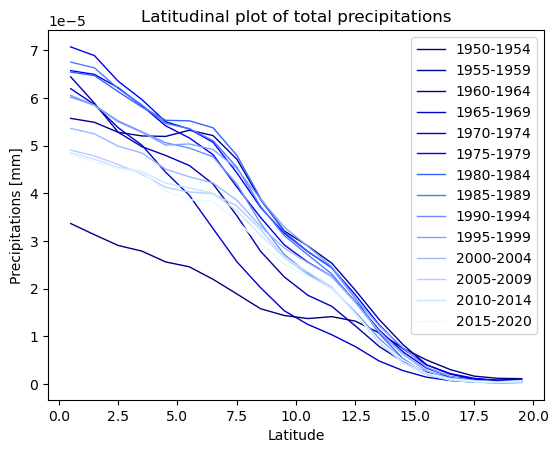

In [18]:


#reds = ["#FF0000", "#EE0000", "#DD0000", "#CC0000", "#BB0000", "#AA0000", "#990000", "#880000", "#770000", "#660000", "#550000", "#440000", "#330000", "#220000"]
#shades = ["#FF0000", "#FF7F00", "#FFFF00", "#7FFF00", "#00FF00", "#00FF7F", "#00FFFF", "#007FFF", "#0000FF", "#7F00FF", "#FF00FF", "#FF007F", "#FF0000", "#FF7F00"]
shades = ["#000080", "#000099", "#0000B2", "#0000CC", "#0000E5", "#0000FF", "#3366FF", "#4D7BFF", "#6690FF", "#80A5FF", "#99BAFF", "#B3CFFF", "#CCE4FF", "#E5F9FF"]

using PyPlot

tp2mean = mean(tp[xrange, yrange, 1:4], dims=3)
tp3mean = mean(tp[xrange, yrange, 5:9], dims=3)
tp4mean = mean(tp[xrange, yrange, 10:14], dims=3)
tp5mean = mean(tp[xrange, yrange, 15:19], dims=3)
tp6mean = mean(tp[xrange, yrange, 20:24], dims=3)
tp7mean = mean(tp[xrange, yrange, 25:29], dims=3)
tp8mean = mean(tp[xrange, yrange, 30:34], dims=3)
tp9mean = mean(tp[xrange, yrange, 35:39], dims=3)
tp10mean = mean(tp[xrange, yrange, 40:44], dims=3)
tp11mean = mean(tp[xrange, yrange, 45:49], dims=3)
tp12mean = mean(tp[xrange, yrange, 50:54], dims=3)
tp13mean = mean(tp[xrange, yrange, 55:59], dims=3)
tp14mean = mean(tp[xrange, yrange, 60:64], dims=3)
tp15mean = mean(tp[xrange, yrange, 65:71], dims=3)

Y = (tp2mean, tp3mean, tp4mean, tp5mean, tp6mean, tp7mean, tp8mean, tp9mean, tp10mean, tp11mean, tp12mean, tp13mean, tp14mean, tp15mean)

figure()

for (i, y) in enumerate(Y)
    plot(lat[yrange], mean(y, dims=1)[:], color=shades[i], label="Curve $i",linewidth=1)
end

xlabel("Latitude")
ylabel("Precipitations [mm]")
title("Latitudinal plot of total precipitations")
legend(["1950-1954","1955-1959","1960-1964","1965-1969","1970-1974","1975-1979","1980-1984","1985-1989","1990-1994","1995-1999","2000-2004","2005-2009","2010-2014","2015-2020"])

show()


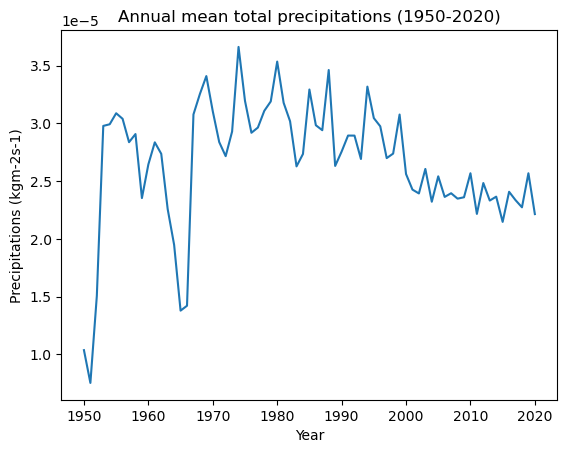

In [20]:
using PyPlot

years = 1950:2020
annual_means = zeros(length(years))

for i in 1:length(years)
    y = tp[xrange, yrange, i]
    annual_means[i] = mean(y)
end

plot(years, annual_means)
xlabel("Year")
ylabel("Precipitations (kgm-2s-1)")
title("Annual mean total precipitations (1950-2020)")
show()





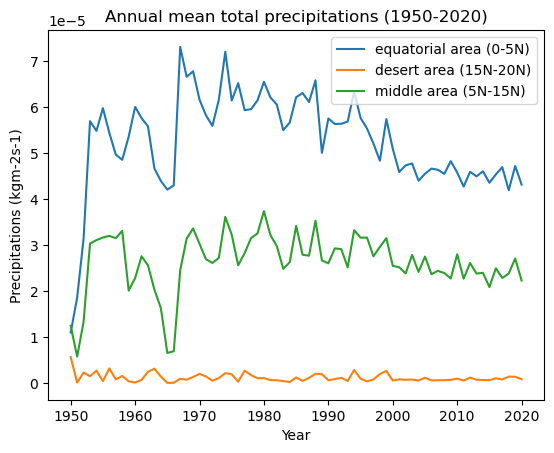

PyObject <matplotlib.legend.Legend object at 0x7f4ae28fb0d0>

In [21]:
using PyPlot
xrange = (lon.>=15) .& (lon.<=20);
yrange_equatorial = (lat.>=0) .& (lat.<=5);
yrange_desert = (lat.>=15) .& (lat.<=20);
yrange_middle = (lat.>=5) .& (lat.<=15);


years = 1950:2020
Pannual_means_equatorial = zeros(length(years))
Pannual_means_desert = zeros(length(years))
Pannual_means_middle = zeros(length(years))

for i in 1:length(years)
    y1 = tp[xrange,yrange_equatorial, i]
    Pannual_means_equatorial[i] = mean(y1)

    y2 = tp[xrange,yrange_desert, i]
    Pannual_means_desert[i] = mean(y2)

    y3 = tp[xrange,yrange_middle, i]
    Pannual_means_middle[i] = mean(y3)

end

plot(years, Pannual_means_equatorial,years,Pannual_means_desert,years,Pannual_means_middle)
xlabel("Year")
ylabel("Precipitations (kgm-2s-1)")
title("Annual mean total precipitations (1950-2020)")
show()
legend(["equatorial area (0-5N)","desert area (15N-20N)", "middle area (5N-15N)"])

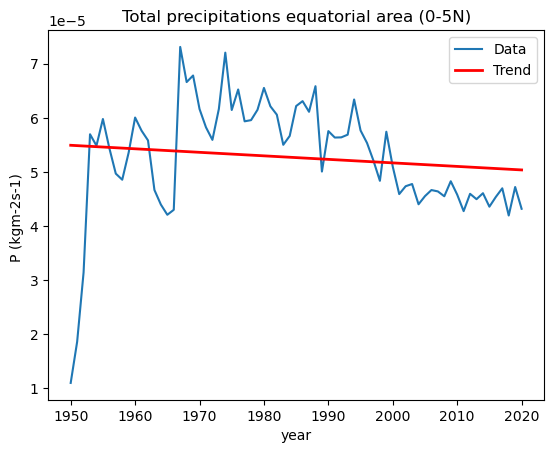

(0.2864, -6.514709026876618e-8)

In [22]:
#TRENDS
using Polynomials #minimise the error 

f=fit(years, Pannual_means_equatorial, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, Pannual_means_equatorial)
plot(years, trend,color=:red,linewidth=2)
xlabel("year"); ylabel("P (kgm-2s-1) ");
title("Total precipitations equatorial area (0-5N)")
legend(["Data","Trend","P/E=1"])

using Random
x=years
y=Pannual_means_equatorial
using Polynomials, Random
function shufflingfit(x, y,a; n=1000)  
  s=zeros(n,1)
  for i=1:n
    f=fit(x,shuffle(y),1)
    s[i]=f[1]
  end
  count = sum(abs.(s).>abs.(a))
  return (count/n) #count/n=count percentage
end
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a

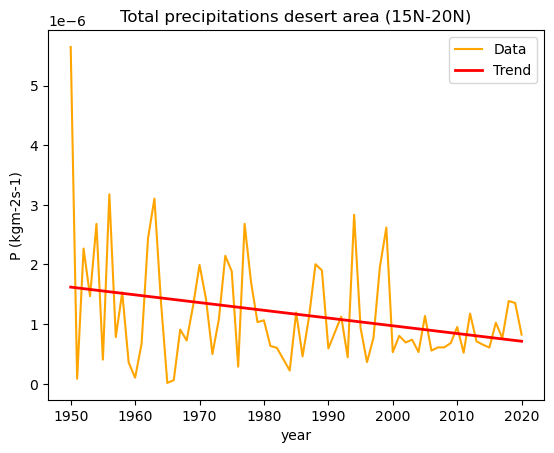

(0.0158, -1.2963488936696947e-8)

In [24]:
using Polynomials #minimise the error 

f=fit(years, Pannual_means_desert, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, Pannual_means_desert,color=:orange)
plot(years, trend,color=:red,linewidth=2)
xlabel("year"); ylabel("P (kgm-2s-1)");
title("Total precipitations desert area (15N-20N)")
legend(["Data","Trend","P/E=1"])
show()
y=Pannual_means_desert
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a

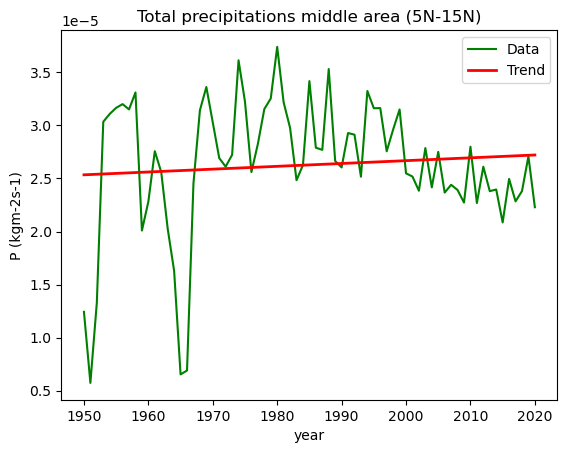

(0.4766, 2.6687952291948158e-8)

In [25]:
using Polynomials #minimise the error 

f=fit(years, Pannual_means_middle, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, Pannual_means_middle,color=:green)
plot(years,trend,color=:red,linewidth=2)
xlabel("year"); ylabel("P (kgm-2s-1)");
title("Total precipitations middle area (5N-15N)")
legend(["Data","Trend","P/E=1"])
show()
y=Pannual_means_middle
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a